<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

You are a consultant for students looking to better their chances in getting into a college.

This data analysis is thus  presented to students looking to maximise their grades in their respective ACT/SAT tests, and to gether insight into how it will affect their chances to entering college.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

From one of the sources in the range of accepted ACT and SAT student scores by colleges

**Data Sources:**

* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State

* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**Further Research:**

Understanding Your Scores : https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html

Interpret Your SAT Scores: https://collegereadiness.collegeboard.org/sat

ACT and SAT scores no longer required for admissions at some colleges: https://www.cbsnews.com/news/act-and-sat-no-longer-required-college-admissions/

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def get_list_mean(input_list):
    total = 0.0 # set a variable to take a float cumulation
    
    for x in input_list: #iterate through the list
        total += x
    
    return total/len(input_list)

#get_list_mean(listobject with int or float elements only)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def get_list_sd(input_list):
    mean = get_list_mean(input_list) #retrieve the mean with the previous mean function to avoid reparsing mean every iteration
    p_var = 0 #cumulative sum of all differences from data point to mean
    
    for x in input_list: # cumulatively summing all variances s^2
        p_var += (x - mean)**2
        
    return (p_var/len(input_list))**0.5 # divide by number of elements in the list, followed by square rooting by indices

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def clean_percent_sign(input_string):
    return float(input_string.replace('%',''))/100 #remove % sign and replace with an empty space, followed by a conversion to a float

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [4]:
# Imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# Code:
act19 = pd.read_csv('../data/act_2019.csv')
sat19 = pd.read_csv('../data/sat_2019.csv')
sat_act_clg = pd.read_csv('../data/sat_act_by_college.csv')

# import all relevant data csv files via panda .read_csv('file_location')

.head() to see what type of data we are dealing with:

In [6]:
#for act19
act19.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [7]:
act19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


Non-null entries matches total entries, so there are no missing data, however participation is an object when it should be a float64!

In [8]:
# viewing participation data
act19['Participation'].head()

0    100%
1     38%
2     73%
3    100%
4     23%
Name: Participation, dtype: object

Data is clearly an object because of the presence of the % sign and numbers require conversion

In [9]:
act19['Participation'] = act19['Participation'].str.rstrip('%').astype('float')/100.0

In [10]:
act19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   Composite      52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


ACT 2019 data is now clean as intended, but column headers need to be renamed:

In [11]:
act19.columns = act19.columns.str.strip().str.lower()

In [12]:
act19

,state,participation,composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6
5,Colorado,0.27,23.8
6,Connecticut,0.22,25.5
7,Delaware,0.13,24.1
8,District of Columbia,0.32,23.5
9,Florida,0.54,20.1


In [13]:
# for sat19ca
sat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [14]:
clean_sat19_part = []
sat19.replace("—",np.nan, inplace = True)
sat19.fillna("0", inplace = True)
for index, data in enumerate(sat19['Participation Rate']):
     clean_sat19_part.append(clean_percent_sign(data))

sat19['Participation Rate'] = clean_sat19_part 
sat19.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


This is utilising the function written above as the coding challenge. I would prefer to use the str.rstrip method, which is a lot faster and more efficient.

In [15]:
# Reimporting data to show methods
sat19 = pd.read_csv('../data/sat_2019.csv')

sat19['Participation Rate'] = sat19['Participation Rate'].str.rstrip('%')

Similar issue to ACT19, where participation rate contains str and thus is unable to be read as a float64 object.

The non-null count to total entries also match, indicating that there is no missing data.

In [16]:
sat19

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7,583,560,1143
1,Alaska,41,556,541,1097
2,Arizona,31,569,565,1134
3,Arkansas,6,582,559,1141
4,California,63,534,531,1065
5,Colorado,100,518,506,1024
6,Connecticut,100,529,516,1046
7,Delaware,100,499,486,985
8,District of Columbia,94,495,480,975
9,Florida,100,516,483,999


Appears we have a string dash that indicates null, but is written as a string, we have to replace it with null value via np.nan

In [17]:
sat19.replace("—",np.nan, inplace = True)

Now we should be able to convert Participation Rate column to float, divide by 100 to complete the conversion

In [18]:
sat19['Participation Rate'] = sat19['Participation Rate'].astype('float')/100.0

In [19]:
sat19.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


SAT 2019 is now clean, but we need to change all columns to lower case and replace spaces with underscore

In [20]:
sat19.rename(columns = {'State':'state', 'Participation Rate': 'participation_rate','EBRW':'ebrw','Math':'math','Total':'total'},inplace = True)

In [21]:
sat19.head()

,state,participation_rate,ebrw,math,total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [22]:
#for sat_act_clg
sat_act_clg.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [23]:
sat_act_clg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


Appears a lot of cleanup needs to be done
We need to remove the '%' from the accept rate, separate the 25th and 75th percentile of ACT and SAT grades and set all Test Optional to a boolean data type

In [24]:
# We start by cleaning up the percentage signs first on Accept Rate
sat_act_clg['Accept Rate'] = sat_act_clg['Accept Rate'].str.rstrip('%').astype('float')/100.0

In [25]:
sat_act_clg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   School                          416 non-null    object 
 1   Test Optional?                  416 non-null    object 
 2   Applies to Class Year(s)        390 non-null    object 
 3   Policy Details                  416 non-null    object 
 4   Number of Applicants            416 non-null    int64  
 5   Accept Rate                     416 non-null    float64
 6   SAT Total 25th-75th Percentile  416 non-null    object 
 7   ACT Total 25th-75th Percentile  416 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 26.1+ KB


We have cleaned up the percentage sign

In [26]:
sat_act_clg['Test Optional?'] = sat_act_clg['Test Optional?'].str.contains('Yes',False)

In [27]:
sat_act_clg.head(10)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,True,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35
1,Harvard College,True,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35
2,Princeton University,True,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35
3,Columbia University,True,2021,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35
4,Yale University,True,2021,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35
5,California Institute of Technology,True,2021 2022,CalTech has adopted a two-year Test Blind poli...,8367,0.064,​​ 1530-1560,35-36
6,Massachusetts Institute of Technology,True,2021,MIT has adopted a one-year test optional polic...,21706,0.067,​​ 1500-1570,34-36
7,Brown University,True,2021,Brown has adopted a one-year test optional pol...,38674,0.071,​​ 1440-1570,33-35
8,University of Chicago,True,All / Permanent Policy,UChicago offers a test optional policy which a...,32283,0.073,​​ 1490-1570,33-35
9,Pomona College,True,2021,Pomona College has adopted a one-year test opt...,10401,0.074,1390-1540,32-35


Now both 'test optional?' field and 'accept rate' field are cleaned

Notice we have an issue where the percentile data is written in a string format of '25th - 75th', we have to extract the data.

In [28]:
# Create a list consisting of the 25th, 75th percentile of each ACT and SAT scores
sat_act_clg['SAT 25th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'].str[:4]
sat_act_clg['SAT 25th Percentile'].head(10)

0    1440
1    1460
2    1440
3    1450
4    1460
5    ​​ 1
6    ​​ 1
7    ​​ 1
8    ​​ 1
9    1390
Name: SAT 25th Percentile, dtype: object

In [29]:
# notice the anomalous 1 on the data upon output from row 5-8, upon checking it appears there is some extra text on it

sat_act_clg.at[5,'SAT 25th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][5][3:7]
sat_act_clg.at[6,'SAT 25th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][6][3:7]
sat_act_clg.at[7,'SAT 25th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][7][3:7]
sat_act_clg.at[8,'SAT 25th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][8][3:7]

In [30]:
# Also on row 200, there is a decimal data 1142.5, which I will manually enter as it is just a single data entry
sat_act_clg.at[200,'SAT 25th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][200][:6]

In [31]:
# Check if the data has been cleaned off
sat_act_clg.head(201)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile,SAT 25th Percentile
0,Stanford University,True,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35,1440
1,Harvard College,True,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35,1460
2,Princeton University,True,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35,1440
3,Columbia University,True,2021,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35,1450
4,Yale University,True,2021,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35,1460
...,...,...,...,...,...,...,...,...,...
196,Muhlenberg College,True,All / Permanent Policy,Muhlenberg College offers a test optional poli...,4146,0.618,1170-1360,26-30,1170
197,Gonzaga University,True,2021,Gonzaga University has adopted a one-year test...,9279,0.619,1210-1358,25-30,1210
198,Beloit College,True,All / Permanent Policy,Beloit offers a test optional policy which all...,3657,0.620,1080-1380,24-30,1080
199,Lawrence University,True,All / Permanent Policy,Lawrence University offers a test optional pol...,3463,0.621,1200-1430,25-32,1200


A side effect of our cleaning is that it left the dashes out, so replace the dashes with blanks.

Also take the chance to set all blanks to null

In [32]:

sat_act_clg['SAT 25th Percentile'] = sat_act_clg['SAT 25th Percentile'].str.replace('-','')
sat_act_clg['SAT 25th Percentile'] = sat_act_clg['SAT 25th Percentile'].replace('',np.nan)

In [33]:
# Check if the data has been fixed
sat_act_clg.head(10)

# We can see the 25th Percentile for SAT has been fixed, convert to float
sat_act_clg['SAT 25th Percentile'] = sat_act_clg['SAT 25th Percentile'].astype('float')
sat_act_clg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   School                          416 non-null    object 
 1   Test Optional?                  416 non-null    bool   
 2   Applies to Class Year(s)        390 non-null    object 
 3   Policy Details                  416 non-null    object 
 4   Number of Applicants            416 non-null    int64  
 5   Accept Rate                     416 non-null    float64
 6   SAT Total 25th-75th Percentile  416 non-null    object 
 7   ACT Total 25th-75th Percentile  416 non-null    object 
 8   SAT 25th Percentile             410 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 26.5+ KB


In [34]:
sat_act_clg['SAT 75th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'].str[4:]
# Repeat the same cleanup process for the 75th Percentile for SAT

In [35]:
# row 5 to 8 has extra strings that needs to be filtered too, filtering them manually
# sat_act_clg.at[5,'SAT 75th Percentile'] = 
sat_act_clg.at[5,'SAT 75th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][5][8:]
sat_act_clg.at[6,'SAT 75th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][6][8:]
sat_act_clg.at[7,'SAT 75th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][7][8:]
sat_act_clg.at[8,'SAT 75th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][8][8:]

In [36]:
# Remember that row 200 has the decimal, our filtering will not work on it as well. As it is the sole anomalous value, I will filter it manually
sat_act_clg.at[200,'SAT 75th Percentile'] = sat_act_clg['SAT Total 25th-75th Percentile'][200][7:]

In [37]:
sat_act_clg['SAT 75th Percentile'] = sat_act_clg['SAT 75th Percentile'].str.replace('-','')
sat_act_clg['SAT 75th Percentile'] = sat_act_clg['SAT 75th Percentile'].replace('',np.nan)

In [38]:
sat_act_clg['SAT 75th Percentile'] = sat_act_clg['SAT 75th Percentile'].astype('float')
sat_act_clg.head(202)

# SAT 75th percentile is now clean

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile,SAT 25th Percentile,SAT 75th Percentile
0,Stanford University,True,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35,1440.0,1570.0
1,Harvard College,True,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35,1460.0,1580.0
2,Princeton University,True,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35,1440.0,1570.0
3,Columbia University,True,2021,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35,1450.0,1560.0
4,Yale University,True,2021,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35,1460.0,1570.0
...,...,...,...,...,...,...,...,...,...,...
197,Gonzaga University,True,2021,Gonzaga University has adopted a one-year test...,9279,0.619,1210-1358,25-30,1210.0,1358.0
198,Beloit College,True,All / Permanent Policy,Beloit offers a test optional policy which all...,3657,0.620,1080-1380,24-30,1080.0,1380.0
199,Lawrence University,True,All / Permanent Policy,Lawrence University offers a test optional pol...,3463,0.621,1200-1430,25-32,1200.0,1430.0
200,University of Utah,True,2021 2022 2023,The University of Utah has adopted a test opti...,24404,0.621,1142.5-1380,22-29,1142.5,1380.0


In [39]:
sat_act_clg['ACT 25th Percentile'] = sat_act_clg['ACT Total 25th-75th Percentile'].str[:2]

In [40]:
# Row 338 data is in decimal format instead of the usual numbers format, as it is only one entry, I will filter manually
sat_act_clg.at[338,'ACT 25th Percentile'] = sat_act_clg['ACT Total 25th-75th Percentile'][338][:4]

In [41]:
sat_act_clg['ACT 25th Percentile'] = sat_act_clg['ACT 25th Percentile'].str.replace('-','')
sat_act_clg['ACT 25th Percentile'] = sat_act_clg['ACT 25th Percentile'].replace('',np.nan)
sat_act_clg['ACT 25th Percentile'] = sat_act_clg['ACT 25th Percentile'].astype('float')

In [42]:
sat_act_clg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   School                          416 non-null    object 
 1   Test Optional?                  416 non-null    bool   
 2   Applies to Class Year(s)        390 non-null    object 
 3   Policy Details                  416 non-null    object 
 4   Number of Applicants            416 non-null    int64  
 5   Accept Rate                     416 non-null    float64
 6   SAT Total 25th-75th Percentile  416 non-null    object 
 7   ACT Total 25th-75th Percentile  416 non-null    object 
 8   SAT 25th Percentile             410 non-null    float64
 9   SAT 75th Percentile             410 non-null    float64
 10  ACT 25th Percentile             410 non-null    float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 33.0+ KB


In [43]:
sat_act_clg['ACT 75th Percentile'] = sat_act_clg['ACT Total 25th-75th Percentile'].str[3:]

In [44]:
# rows 239 and 338 has non-standard decimal numbers for ACT 75th percentile, adding them manually
sat_act_clg.at[239,'ACT 75th Percentile'] = sat_act_clg['ACT Total 25th-75th Percentile'][239][3:]
sat_act_clg.at[338,'ACT 75th Percentile'] = sat_act_clg['ACT Total 25th-75th Percentile'][338][3:]

In [45]:
sat_act_clg['ACT 75th Percentile'] = sat_act_clg['ACT 75th Percentile'].str.replace('-','')
sat_act_clg['ACT 75th Percentile'] = sat_act_clg['ACT 75th Percentile'].replace('',np.nan)
sat_act_clg['ACT 75th Percentile'] = sat_act_clg['ACT 75th Percentile'].astype('float')

In [46]:
sat_act_clg.head(10)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile,SAT 25th Percentile,SAT 75th Percentile,ACT 25th Percentile,ACT 75th Percentile
0,Stanford University,True,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35,1440.0,1570.0,32.0,35.0
1,Harvard College,True,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35,1460.0,1580.0,33.0,35.0
2,Princeton University,True,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35,1440.0,1570.0,32.0,35.0
3,Columbia University,True,2021,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35,1450.0,1560.0,33.0,35.0
4,Yale University,True,2021,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35,1460.0,1570.0,33.0,35.0
5,California Institute of Technology,True,2021 2022,CalTech has adopted a two-year Test Blind poli...,8367,0.064,​​ 1530-1560,35-36,1530.0,1560.0,35.0,36.0
6,Massachusetts Institute of Technology,True,2021,MIT has adopted a one-year test optional polic...,21706,0.067,​​ 1500-1570,34-36,1500.0,1570.0,34.0,36.0
7,Brown University,True,2021,Brown has adopted a one-year test optional pol...,38674,0.071,​​ 1440-1570,33-35,1440.0,1570.0,33.0,35.0
8,University of Chicago,True,All / Permanent Policy,UChicago offers a test optional policy which a...,32283,0.073,​​ 1490-1570,33-35,1490.0,1570.0,33.0,35.0
9,Pomona College,True,2021,Pomona College has adopted a one-year test opt...,10401,0.074,1390-1540,32-35,1390.0,1540.0,32.0,35.0


Policy details, total 25th-75th Percentile for SAT and ACT are now cleaned, processed and are unneeded and thus should be dropped

We are also assuming the year of application is not significant and dropping that data as well.

In [47]:
sat_act_clg.drop(['Policy Details'],1, inplace = True)
sat_act_clg.drop(['SAT Total 25th-75th Percentile'],1, inplace = True)
sat_act_clg.drop(['ACT Total 25th-75th Percentile'],1, inplace = True)
sat_act_clg.drop(['Applies to Class Year(s)'],1, inplace = True)

In [48]:
sat_act_clg.head()

,School,Test Optional?,Number of Applicants,Accept Rate,SAT 25th Percentile,SAT 75th Percentile,ACT 25th Percentile,ACT 75th Percentile
0,Stanford University,True,47452,0.043,1440.0,1570.0,32.0,35.0
1,Harvard College,True,42749,0.047,1460.0,1580.0,33.0,35.0
2,Princeton University,True,35370,0.055,1440.0,1570.0,32.0,35.0
3,Columbia University,True,40203,0.055,1450.0,1560.0,33.0,35.0
4,Yale University,True,36844,0.061,1460.0,1570.0,33.0,35.0


Now to rename all columns

In [49]:
sat_act_clg.columns = sat_act_clg.columns.str.replace(' ','_').str.lower()
sat_act_clg.columns = sat_act_clg.columns.str.replace('?','')

In [50]:
sat_act_clg.head()

,school,test_optional,number_of_applicants,accept_rate,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
0,Stanford University,True,47452,0.043,1440.0,1570.0,32.0,35.0
1,Harvard College,True,42749,0.047,1460.0,1580.0,33.0,35.0
2,Princeton University,True,35370,0.055,1440.0,1570.0,32.0,35.0
3,Columbia University,True,40203,0.055,1450.0,1560.0,33.0,35.0
4,Yale University,True,36844,0.061,1460.0,1570.0,33.0,35.0


Data are now cleaned and processed, saving to new CSV files

In [51]:
act19.to_csv('cleaned_act_2019.csv',index = False)
sat19.to_csv('cleaned_sat_2019.csv',index = False)
sat_act_clg.to_csv('cleaned_sat_act_by_college.csv',index = False)

Perform a merge of both SAT and ACT 2019 data

In [52]:
act_sat_19 = act19.merge(sat19,'left')
act_sat_19.rename(columns = {'state':'state','participation': 'act_participation','composite':'act_composite','participation_rate':'sat_participation','ebrw':'sat_ebrw','math':'sat_math','total':'sat_total'}, inplace = True)
act_sat_19

,state,act_participation,act_composite,sat_participation,sat_ebrw,sat_math,sat_total
0,Alabama,1.00,18.9,0.07,583.0,560.0,1143.0
1,Alaska,0.38,20.1,0.41,556.0,541.0,1097.0
2,Arizona,0.73,19.0,0.31,569.0,565.0,1134.0
3,Arkansas,1.00,19.3,0.06,582.0,559.0,1141.0
4,California,0.23,22.6,0.63,534.0,531.0,1065.0
5,Colorado,0.27,23.8,1.00,518.0,506.0,1024.0
6,Connecticut,0.22,25.5,1.00,529.0,516.0,1046.0
7,Delaware,0.13,24.1,1.00,499.0,486.0,985.0
8,District of Columbia,0.32,23.5,0.94,495.0,480.0,975.0
9,Florida,0.54,20.1,1.00,516.0,483.0,999.0


Let's express ACT and SAT scores in a percentage of overall grade, the maximum scores for ACT and SAT are 36 and 1600 respectively. We know this from our ACT and SAT sources listed on the sources cell above.

In [53]:
act_sat_19['weighted_act_comp'] = act_sat_19['act_composite']/36.0
act_sat_19['weighted_sat_comp'] = act_sat_19['sat_total']/1600.0

Now we can express the overall weights as an estimate of overall state performance in both exams

In [54]:
act_sat_19['overall_grade_weight'] = (act_sat_19['act_composite']/36.0 + act_sat_19['sat_total']/1600.0)/2.0

Saving the overall CSV of act_sat_19 Dataframe

In [55]:
act_sat_19.to_csv('act_sat_19_combined.csv',index = False)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|ACT 2019 and SAT 2019|The state which students took the ACT exam|
|**participation**|*float*|ACT 2019 and SAT 2019|Percentage of eligible students (In high school) who took ACT|
|**composite**|*float*|ACT 2019 and SAT 2019|Average Composite Score of students who took ACT 2019 in the state|
|**weighted_act_comp**|*float*|ACT 2019 and SAT 2019|Percentage score of students' ACT composite results|
|**weighted_sat_comp**|*float*|ACT 2019 and SAT 2019|Percentage score of students' SAT total score results|
|**overall_grade_weight**|*float*|ACT 2019 and SAT 2019|The state which students took the ACT exam|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**school**|*string*|SAT and ACT by College|Name of the school|
|**test_optional**|*boolean*|SAT and ACT by College|Indicates if the school has optional ACT or SAT requirements|
|**number_of_applicants**|*integer*|SAT and ACT by College|Total number of applicants to the school|
|**accept_rate**|*float*|SAT and ACT by College|The percentage of students accepted to the school|
|**sat_25th_percentile**|*float*|SAT and ACT by College|25th percentile total score of all students applying with SAT examination results|
|**sat_75th_percentile**|*float*|SAT and ACT by College|75th percentile of total score all students applying with SAT examination results|
|**act_25th_percentile**|*float*|SAT and ACT by College|25th percentile of composite score all students applying with ACT examination results|
|**act_75th_percentile**|*float*|SAT and ACT by College|75th percentile of composite score all students applying with ACT examination results|


## Exploratory Data Analysis

In [56]:
# Summary Statistics of each individual dataframe
act19.describe()

,participation,composite
count,52.000000,52.000000
mean,0.585385,21.450000
std,0.341883,2.175487
min,0.060000,17.900000
25%,0.247500,19.800000
50%,0.530000,20.950000
75%,1.000000,23.650000
max,1.000000,25.500000


This is a summary statistics of ACT 2019 results.

In [57]:
# Using Dictionary Comprehension to apply SD formula to ACT19
sd_act1 = {'participation' : get_list_sd(act19['participation']), 'composite': get_list_sd(act19['composite'])}
sd_act1
# Note! Difference between the describe() std and the dictionary comprehension SD is because count SD formula is used instead of a population SD formula

{'participation': 0.33857996180008104, 'composite': 2.154467630119044}

In [58]:
sat19.describe()

,participation_rate,ebrw,math,total
count,51.000000,53.000000,53.000000,53.000000
mean,0.490588,558.000000,548.471698,1106.528302
std,0.387476,47.554422,53.785044,100.994784
min,0.020000,483.000000,445.000000,935.000000
25%,0.055000,518.000000,506.000000,1024.000000
50%,0.540000,550.000000,545.000000,1097.000000
75%,0.820000,610.000000,596.000000,1200.000000
max,1.000000,636.000000,648.000000,1284.000000


The standard deviation of participation rate and composite of ACT 2019 in US in overall is 0.341883 and 2.175487 respectively. 

In [59]:
# sat19 data via dictionary comprehension

sd_sat1 = {'participation' : get_list_sd(sat19['participation_rate'].dropna()), 'ebrw': get_list_sd(sat19['ebrw']), 'math' : get_list_sd(sat19['math']), 'total' : get_list_sd(list(sat19['total']))}
sd_sat1

# participation rate for sat1 has missing data, so we are dropping the missing data to find the overall statistics

{'participation': 0.3836584048685726,
 'ebrw': 47.10365927378819,
 'math': 53.27522124781091,
 'total': 100.03746539183244}

In [60]:
sat_act_clg.describe()

,number_of_applicants,accept_rate,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
count,416.000000,416.000000,410.000000,410.000000,410.000000,410.000000
mean,17481.759615,0.557034,1167.008537,1358.892683,24.712927,30.621463
std,17447.621897,0.242117,129.586121,111.431443,4.127758,14.924176
min,211.000000,0.043000,793.000000,1050.000000,15.000000,19.000000
25%,5313.000000,0.376250,1070.000000,1270.000000,22.000000,28.000000
50%,11622.000000,0.613000,1150.000000,1350.000000,24.000000,30.000000
75%,23599.750000,0.742250,1250.000000,1440.000000,28.000000,32.000000
max,111322.000000,0.999000,1530.000000,1580.000000,35.000000,325.300000


In [61]:
act_25_mean = sat_act_clg['act_25th_percentile'].mean()
act_75_mean = sat_act_clg['act_75th_percentile'].mean()
sat_25_mean = sat_act_clg['sat_25th_percentile'].mean()
sat_75_mean = sat_act_clg['sat_75th_percentile'].mean()
overall_25_mean = (act_25_mean/36.0 + sat_25_mean/1600.0)/2.0
overall_75_mean = (act_75_mean/36.0 + sat_75_mean/1600.0)/2.0
print('ACT 2019 25th to 75th Percentile range: ' + str(act_25_mean) + ' - ' + str(act_75_mean))
print('SAT 2019 25th to 75th Percentile range: ' + str(sat_25_mean) + ' - ' + str(sat_75_mean))
print('Overall Weighted 2019 25th to 75th Percentile range: ' + str(overall_25_mean) + ' - ' + str(overall_75_mean))

ACT 2019 25th to 75th Percentile range: 24.71292682926829 - 30.621463414634146
SAT 2019 25th to 75th Percentile range: 1167.0085365853658 - 1358.8926829268294
Overall Weighted 2019 25th to 75th Percentile range: 0.7079252625338753 - 0.849952066395664


This data is significant in our recommendation. 

This indicates that for ACT, typical admission score range is from 24.7 - 30.6, and 1167 - 1359 for SAT scores.

This means that a large proportion of students admitted into college via ACT/SAT scored about 24.7 for ACT, or 1167 for SAT. It will be prudent for potential student to score above those grades to get into college. 

In [62]:
act_sat_19['overall_participation'] = act_sat_19['act_participation'] + act_sat_19['sat_participation']
act_sat_19

,state,act_participation,act_composite,sat_participation,sat_ebrw,sat_math,sat_total,weighted_act_comp,weighted_sat_comp,overall_grade_weight,overall_participation
0,Alabama,1.00,18.9,0.07,583.0,560.0,1143.0,0.525000,0.714375,0.619687,1.07
1,Alaska,0.38,20.1,0.41,556.0,541.0,1097.0,0.558333,0.685625,0.621979,0.79
2,Arizona,0.73,19.0,0.31,569.0,565.0,1134.0,0.527778,0.708750,0.618264,1.04
3,Arkansas,1.00,19.3,0.06,582.0,559.0,1141.0,0.536111,0.713125,0.624618,1.06
4,California,0.23,22.6,0.63,534.0,531.0,1065.0,0.627778,0.665625,0.646701,0.86
5,Colorado,0.27,23.8,1.00,518.0,506.0,1024.0,0.661111,0.640000,0.650556,1.27
6,Connecticut,0.22,25.5,1.00,529.0,516.0,1046.0,0.708333,0.653750,0.681042,1.22
7,Delaware,0.13,24.1,1.00,499.0,486.0,985.0,0.669444,0.615625,0.642535,1.13
8,District of Columbia,0.32,23.5,0.94,495.0,480.0,975.0,0.652778,0.609375,0.631076,1.26
9,Florida,0.54,20.1,1.00,516.0,483.0,999.0,0.558333,0.624375,0.591354,1.54


We are also interested to find out the overall participation rate of each state on both exams

In [63]:
act_sat_19.describe()

,act_participation,act_composite,sat_participation,sat_ebrw,sat_math,sat_total,weighted_act_comp,weighted_sat_comp,overall_grade_weight,overall_participation
count,52.000000,52.000000,51.000000,51.000000,51.000000,51.000000,52.000000,51.000000,51.000000,51.000000
mean,0.585385,21.450000,0.490588,560.803922,552.196078,1113.078431,0.595833,0.695674,0.645958,1.077255
std,0.341883,2.175487,0.387476,46.248035,51.290553,97.197910,0.060430,0.060749,0.032636,0.194382
min,0.060000,17.900000,0.020000,483.000000,460.000000,943.000000,0.497222,0.589375,0.563438,0.690000
25%,0.247500,19.800000,0.055000,527.500000,511.500000,1038.000000,0.550000,0.648750,0.622396,0.965000
50%,0.530000,20.950000,0.540000,550.000000,546.000000,1097.000000,0.581944,0.685625,0.650000,1.050000
75%,1.000000,23.650000,0.820000,612.000000,599.000000,1210.000000,0.656944,0.756250,0.672153,1.195000
max,1.000000,25.500000,1.000000,636.000000,648.000000,1284.000000,0.708333,0.802500,0.704167,1.540000


This data is significant. There is a larger than 100% combined participation rate for ACT and SAT, indicating that there must be eligible students taking both examinations. This is important as we want to see the correlations for overall participation vs the actual grades they score.

## Visualization of Collected Data



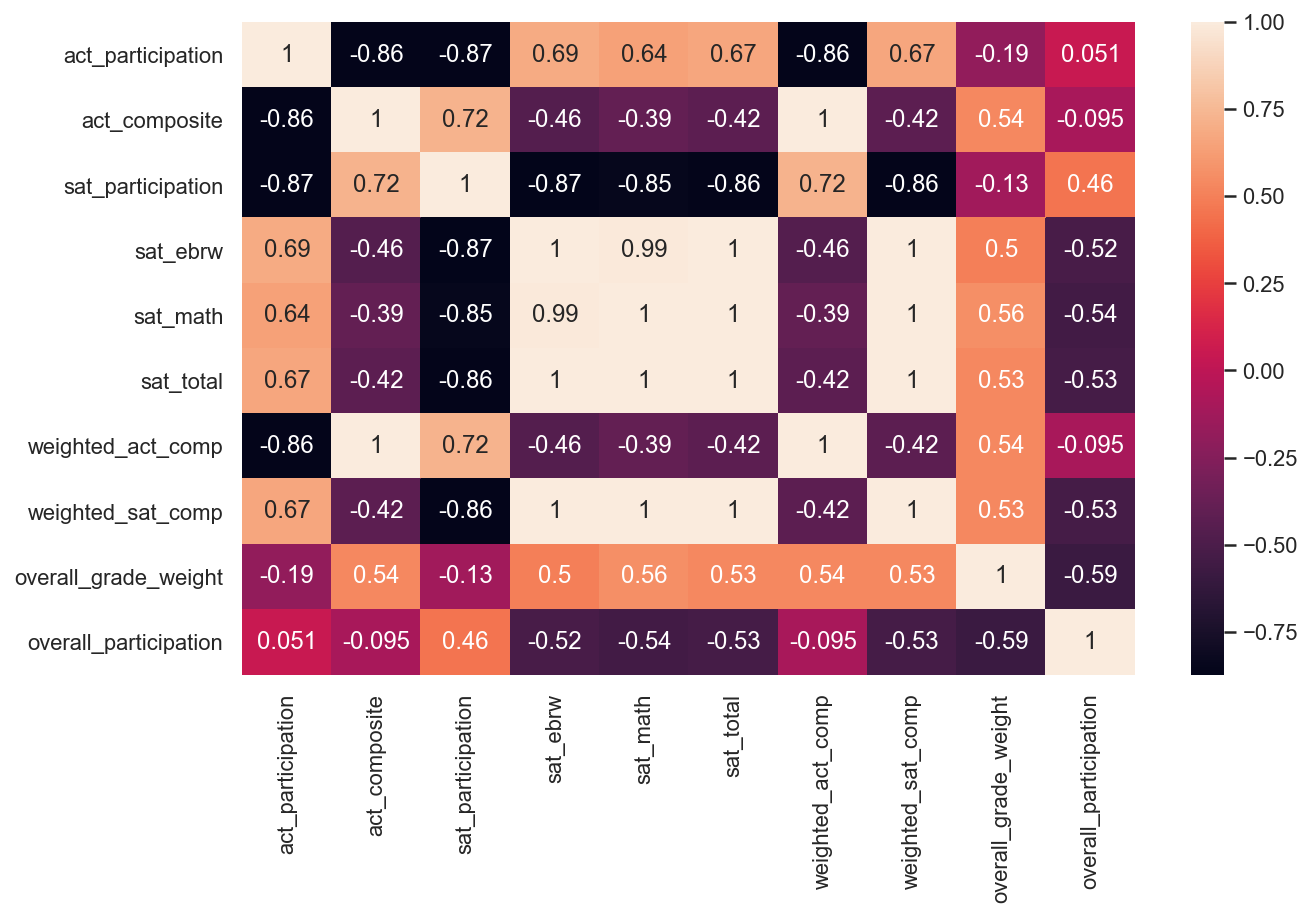

In [64]:
# Code
act_sat_19.fillna(0)
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(act_sat_19.corr(), annot = True)

This heatmap indicates a lot of data correlation that needs to be broken down slowly.

Firstly, it is clear that the higher the participation of the respective tests, the lower the grades, as indicated by the dark colors when checking against ACT and SAT participation fields.

This data also indicates that typically the relationship of the SAT papers are independent of each other as the relationship is quite close together with minor variations in intensity.

It also indicates that generally the higher the participation of a state, there would be more people taking SAT over ACT.

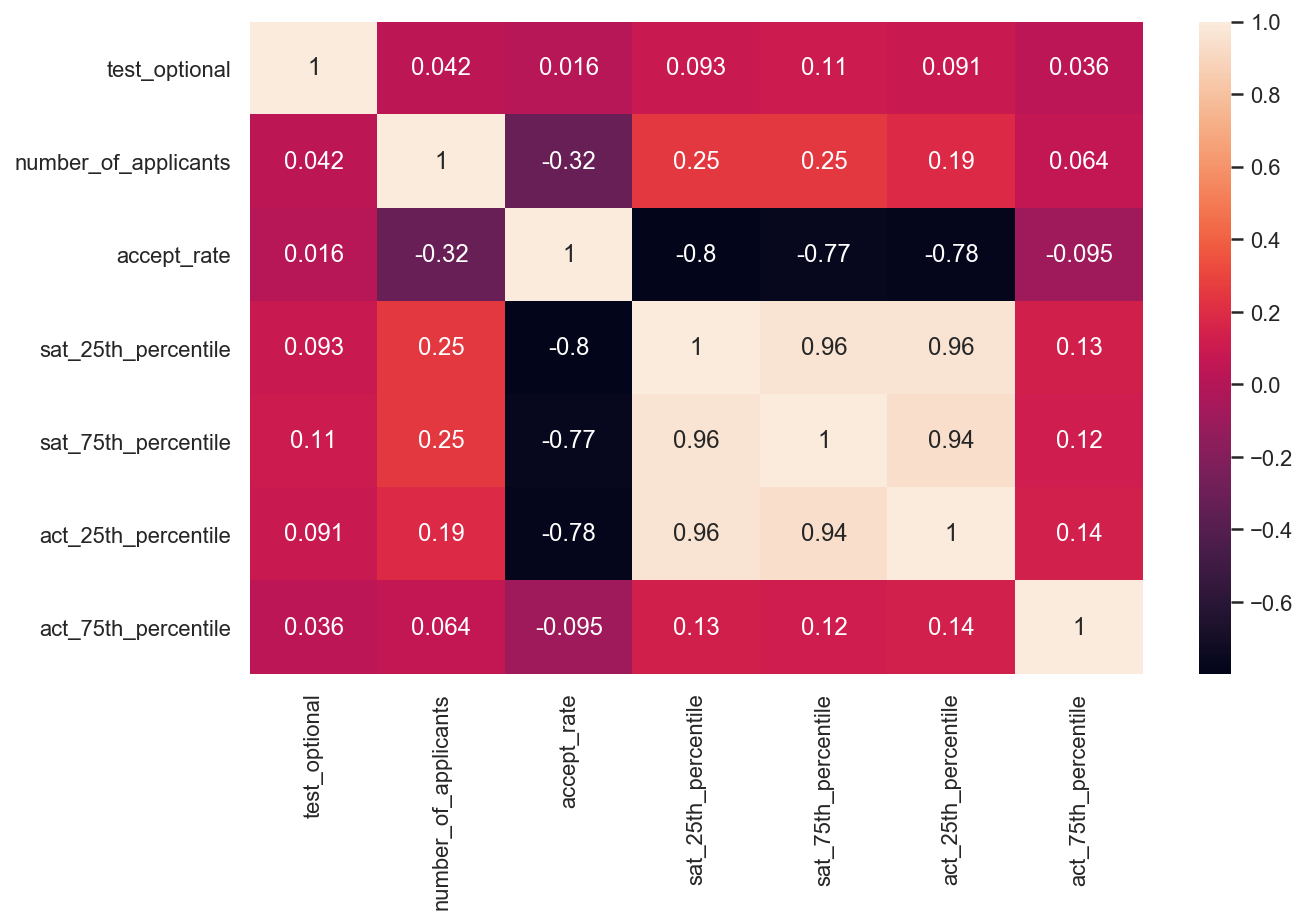

In [65]:
sns.heatmap(sat_act_clg.corr(), annot = True)

# Looking for correlations in a heatmap

From this heatmap, we can see that there is an increase in number of applicants when a test optional scheme is implemented, which is to be expected. 

However, there is also a significant increase in the results of the SAT 75th percentile, indicating that the band of grade of students accepted is much wider. 

We can also see clearly that as the number of applicants go up, the acceptance rate of the college goes down.

<function matplotlib.pyplot.show(*args, **kw)>

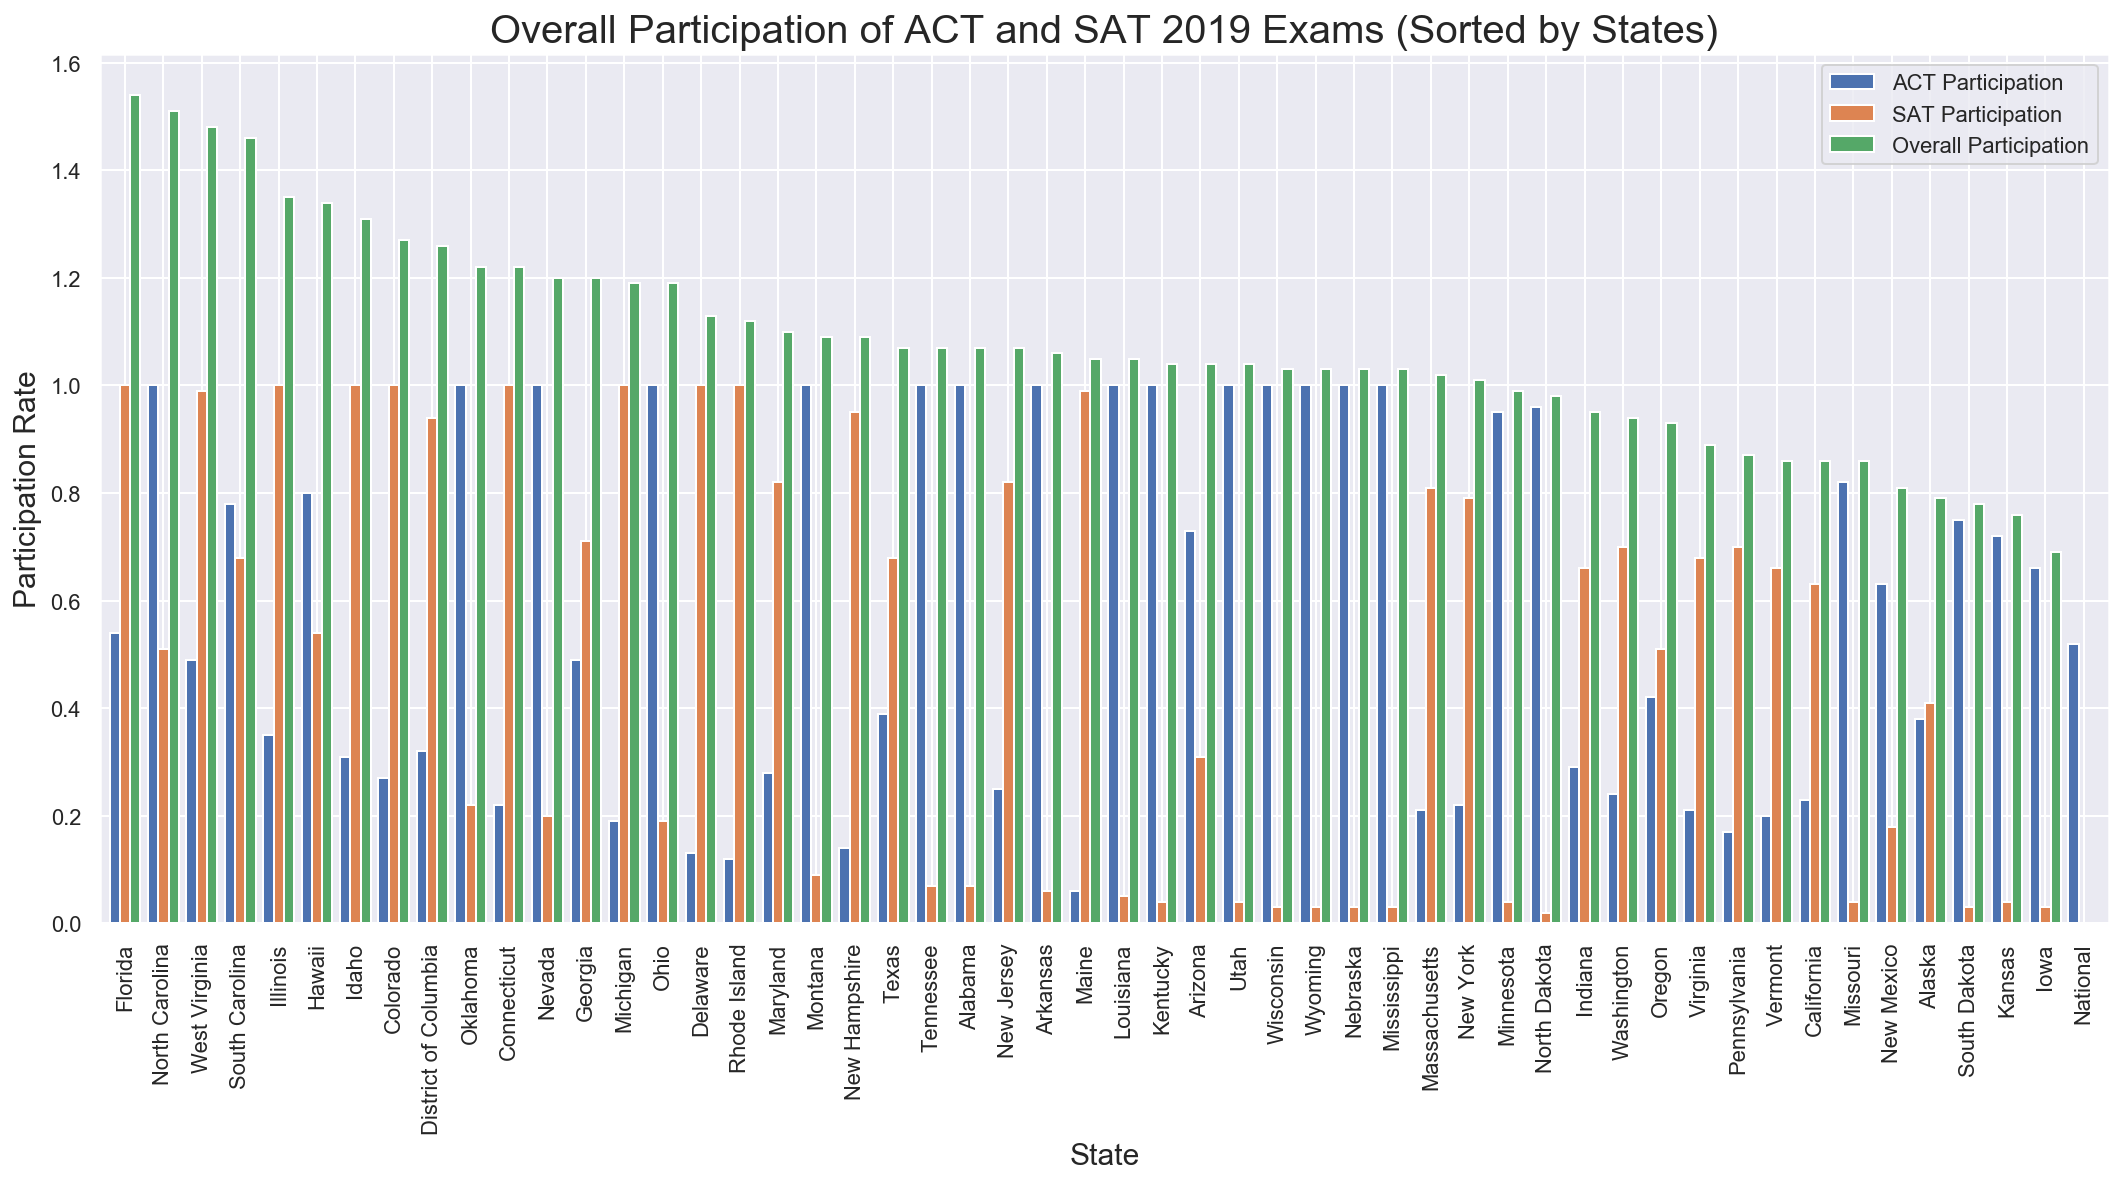

In [66]:
act_sat_19.sort_values(by=['overall_participation'], ascending = False, inplace = True)
act_sat_19.plot(x = 'state', y = ['act_participation','sat_participation','overall_participation'], kind = 'bar',figsize = (18,8), width =0.8, label = ['ACT Participation','SAT Participation','Overall Participation'])
plt.rcParams.update({'font.size': 15})

plt.title('Overall Participation of ACT and SAT 2019 Exams (Sorted by States)',fontsize= 20)
plt.xlabel('State',fontsize= 15)
plt.ylabel('Participation Rate', fontsize= 15)

plt.show

This plot shows overall participation by each state, however we are more interested in the proportion of SAT and ACT relative  to the overall participation rate of each state, as well as the overall participation rate in general.

This data tells us that the 4 states with the highest exam participation rates are Florida, North Carolina, South Carolina and West Virginia. This also is in line with the location of the Ivy league colleges.

The states with the lowest participation rates are New Mexico, Alaska, Iowa, Kansas and South Dakota.

Text(0, 0.5, 'Average ACT Composite Score')

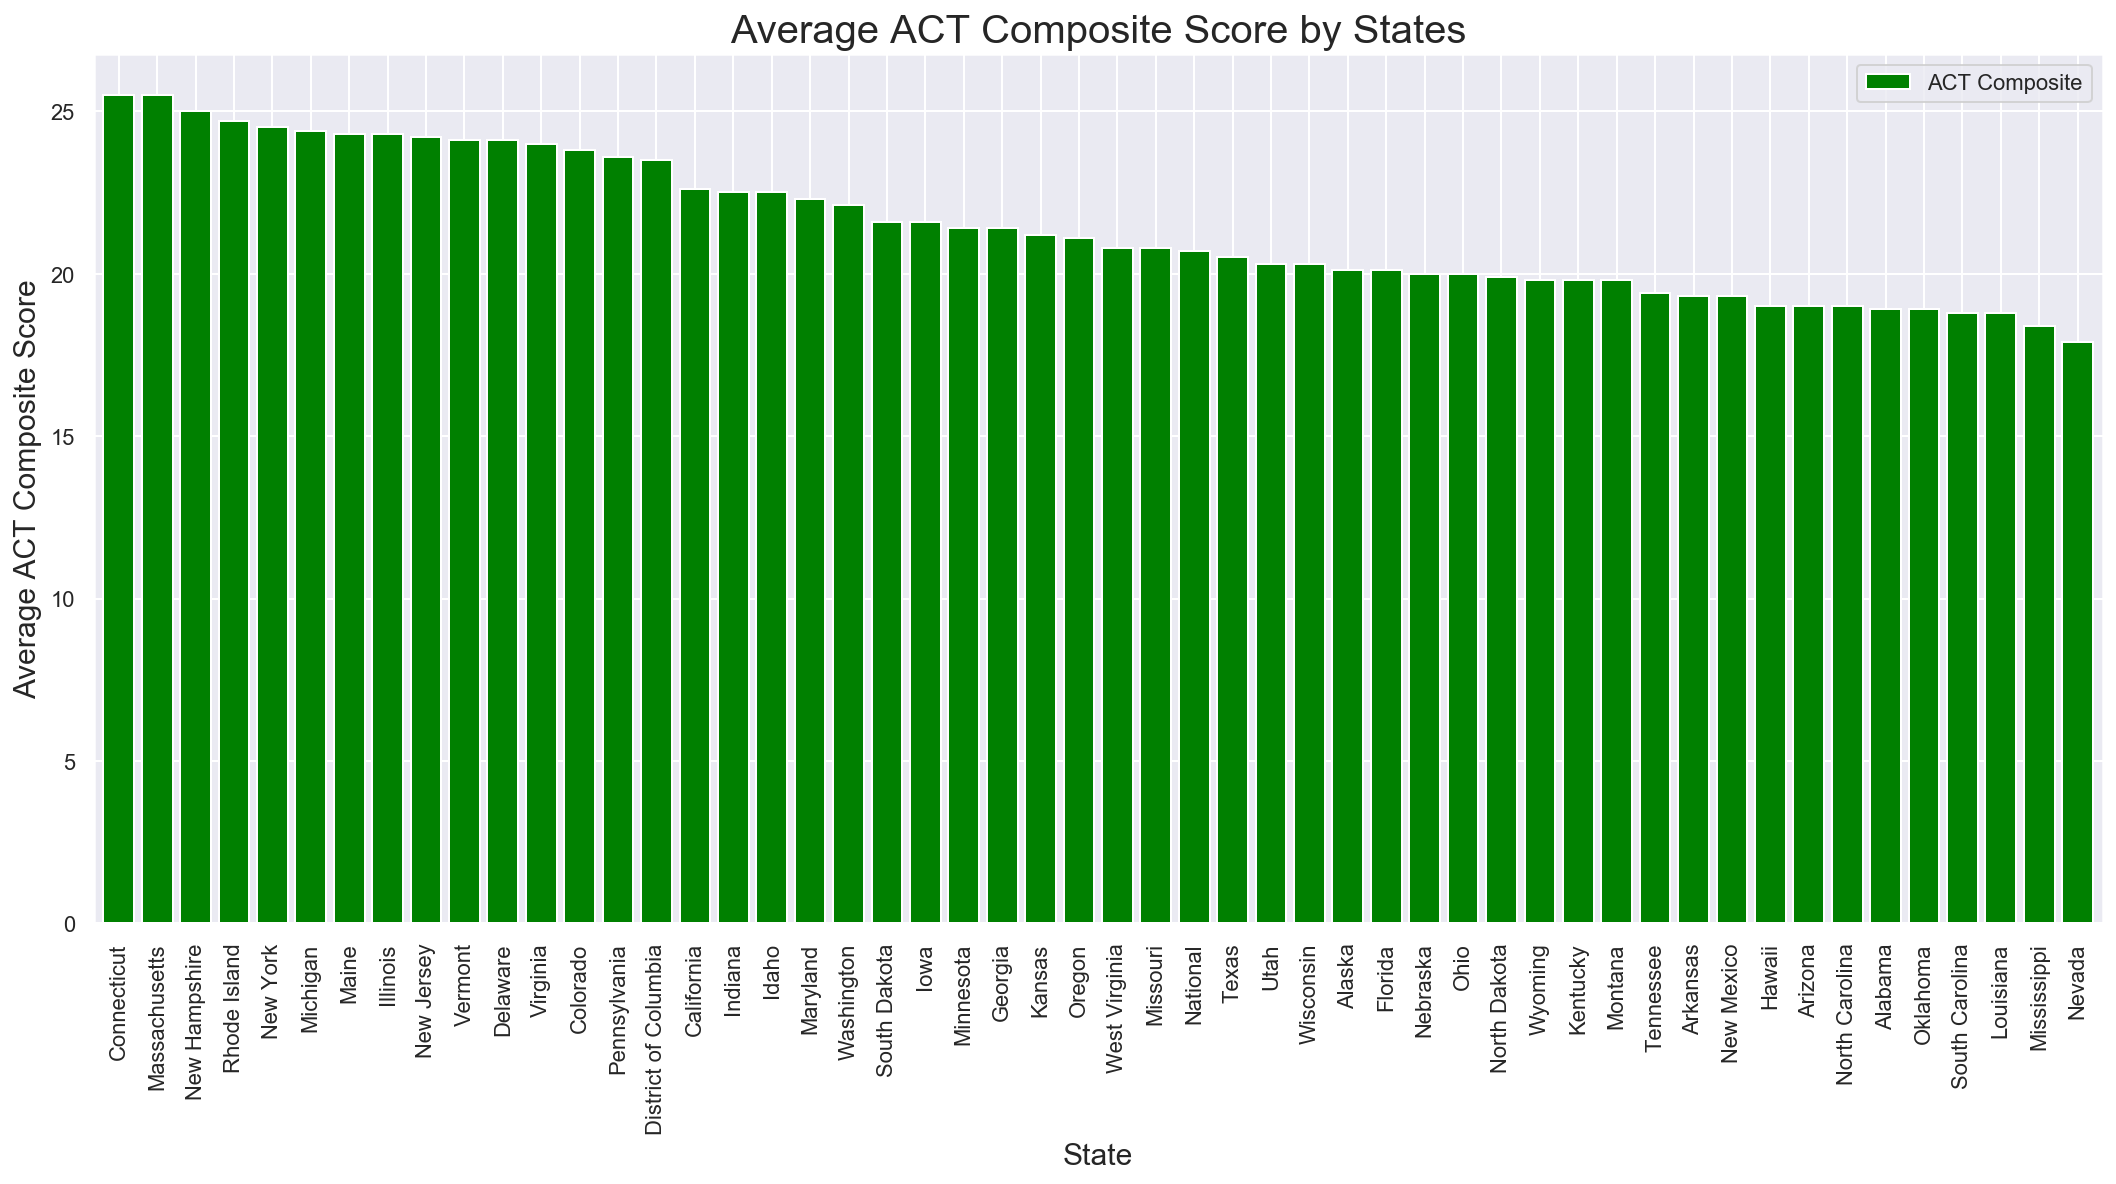

In [67]:
act_sat_19.sort_values(by=['act_composite'], ascending = False, inplace = True,)
act_sat_19.plot(x = 'state', y = 'act_composite', kind = 'bar',figsize = (18,8), width =0.8, color = 'Green', label = 'ACT Composite')

plt.title('Average ACT Composite Score by States',fontsize= 20)
plt.xlabel('State',fontsize= 15)
plt.ylabel('Average ACT Composite Score', fontsize= 15)

Connecticut, Massachusetts, New Hampshire, Rhode Island and New York are the 5 highest scoring states in its ACT exams.
Note that these locations may have Ivy League colleges.

Nevada, Mississippi, Louisiana, South Carolina and Oklahoma are the 5 lowest scoring states in its ACT exams.

Text(0, 0.5, 'Average SAT Composite Score')

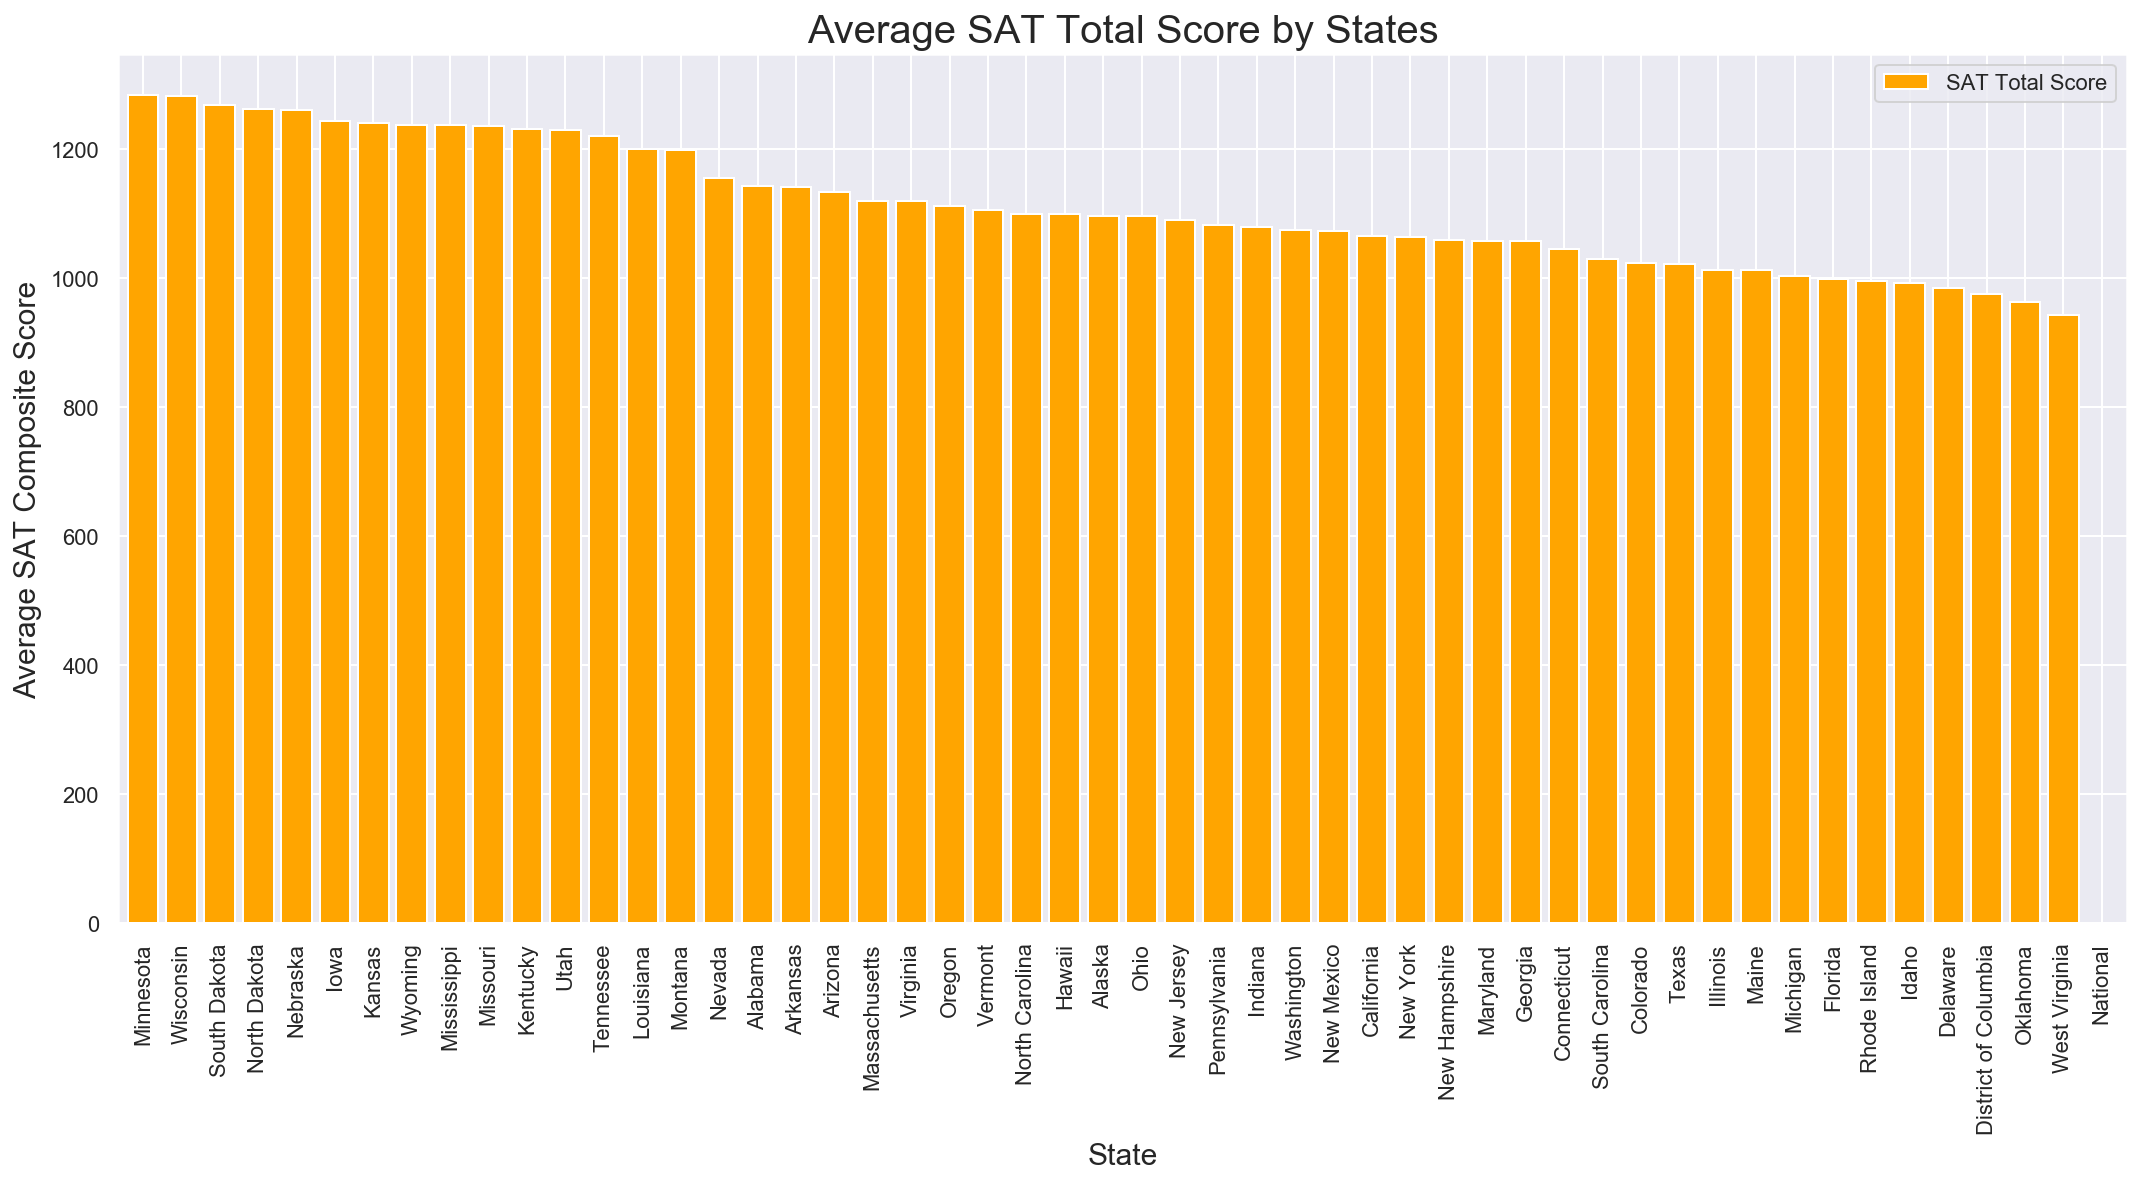

In [68]:
act_sat_19.sort_values(by = ['sat_total'], ascending = False, inplace = True)
act_sat_19.plot(x = 'state', y = 'sat_total', kind = 'bar',figsize = (18,8), width =0.8,color = 'Orange', label = 'SAT Total Score')

plt.title('Average SAT Total Score by States',fontsize= 20)
plt.xlabel('State',fontsize= 15)
plt.ylabel('Average SAT Composite Score', fontsize= 15)

Minnesota, Wisconsin, South Dakota, North Dakota and Nebraska are the 5 highest scoring states in their SAT exams. These locations may have Ivy league colleges as well.

West Virginia, Oklahoma, District of Columbia, Delaware and Idaho are the 5 lowest scoring states in their SAT exams.

Text(0, 0.5, 'Weighted Score')

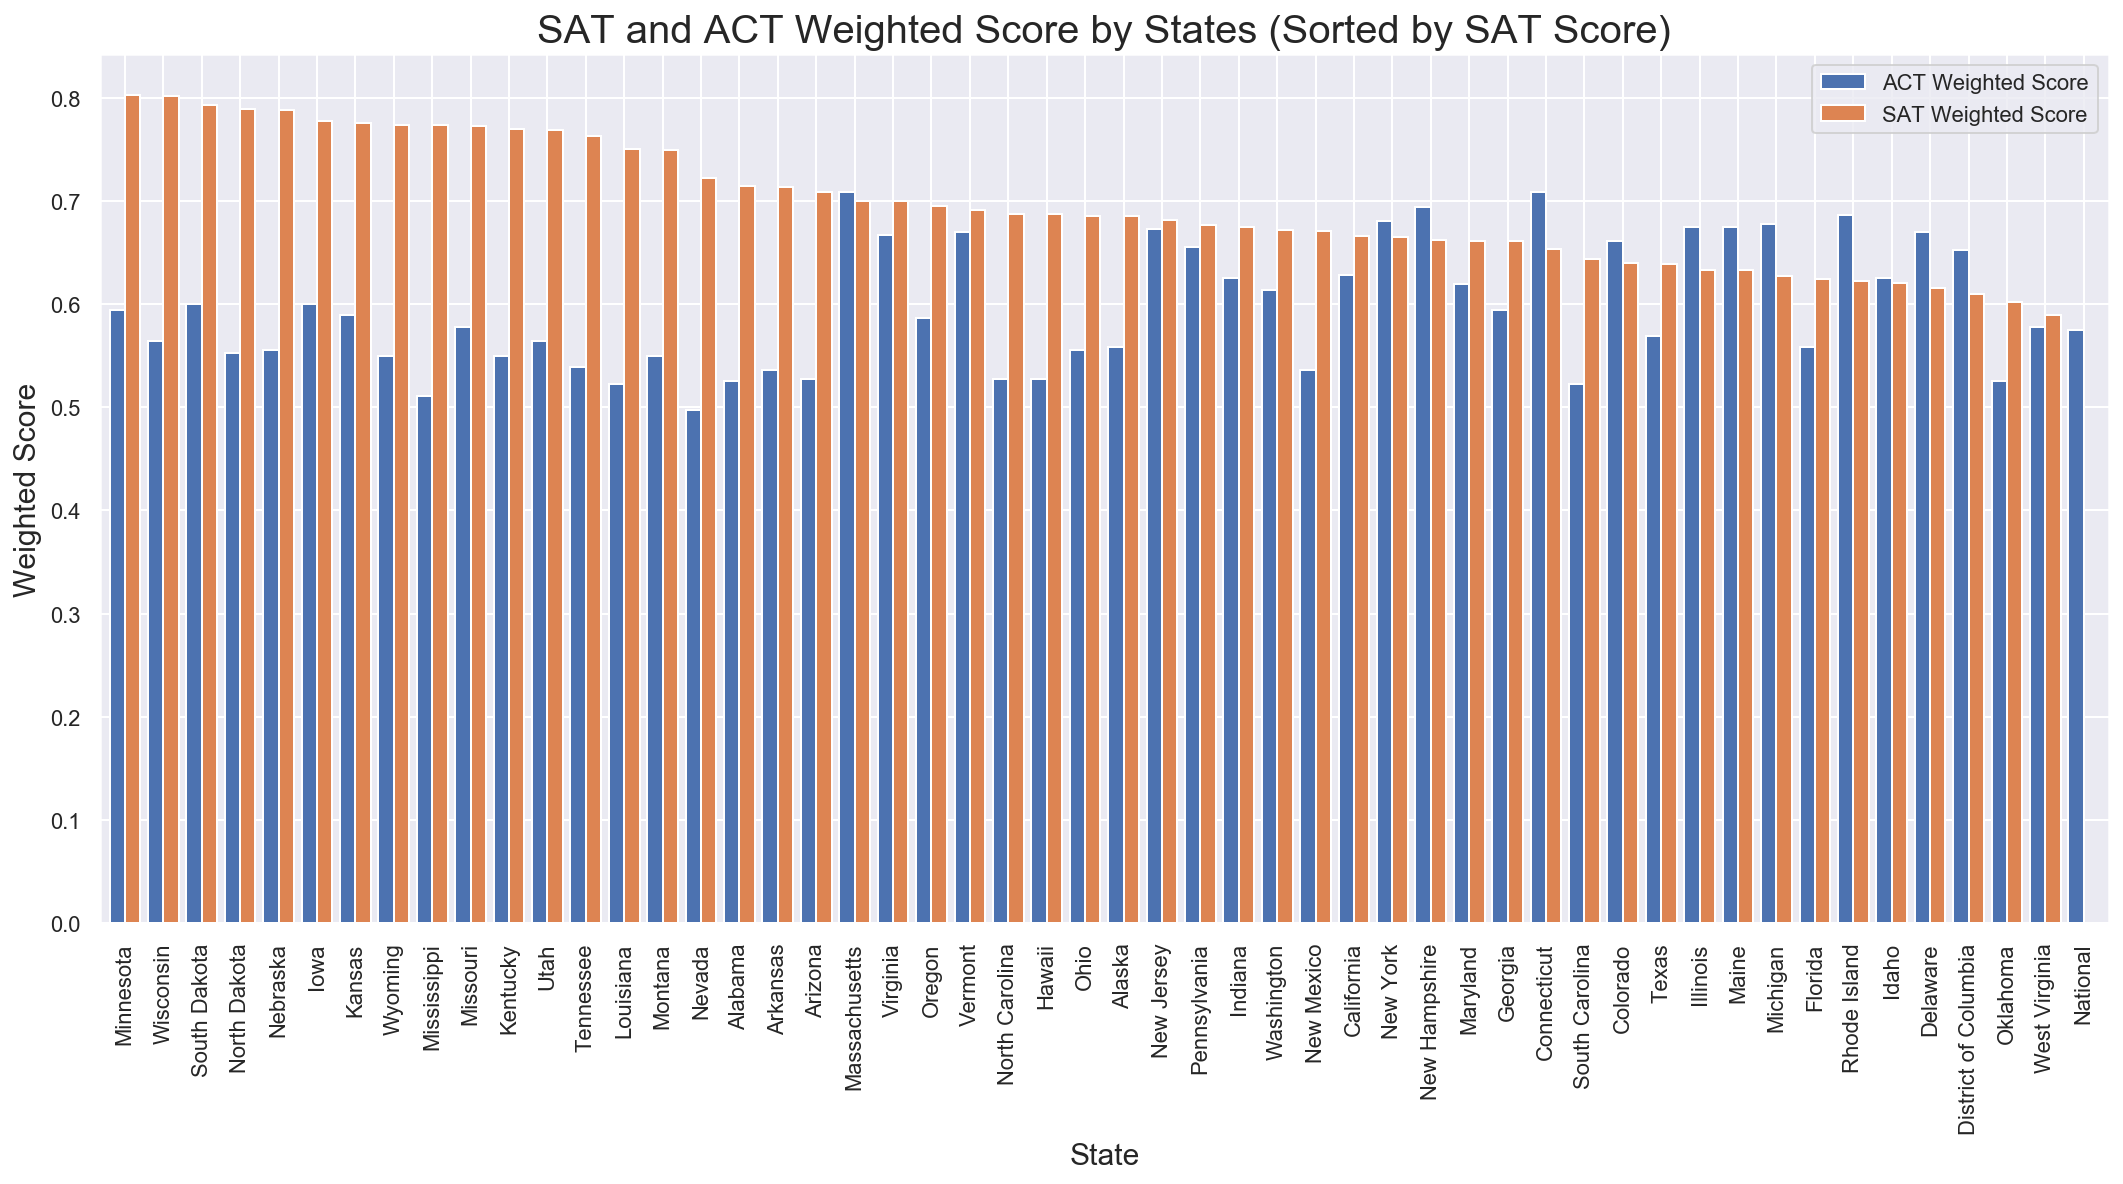

In [69]:
act_sat_19.sort_values(by = ['weighted_sat_comp'], ascending = False, inplace = True)
act_sat_19.plot(x = 'state', y = ['weighted_act_comp', 'weighted_sat_comp'], kind = 'bar',figsize = (18,8), width =0.8, label=['ACT Weighted Score','SAT Weighted Score'])

plt.title('SAT and ACT Weighted Score by States (Sorted by SAT Score)',fontsize= 20)
plt.xlabel('State',fontsize= 15)
plt.ylabel('Weighted Score', fontsize= 15)

Text(0, 0.5, 'Weighted Score')

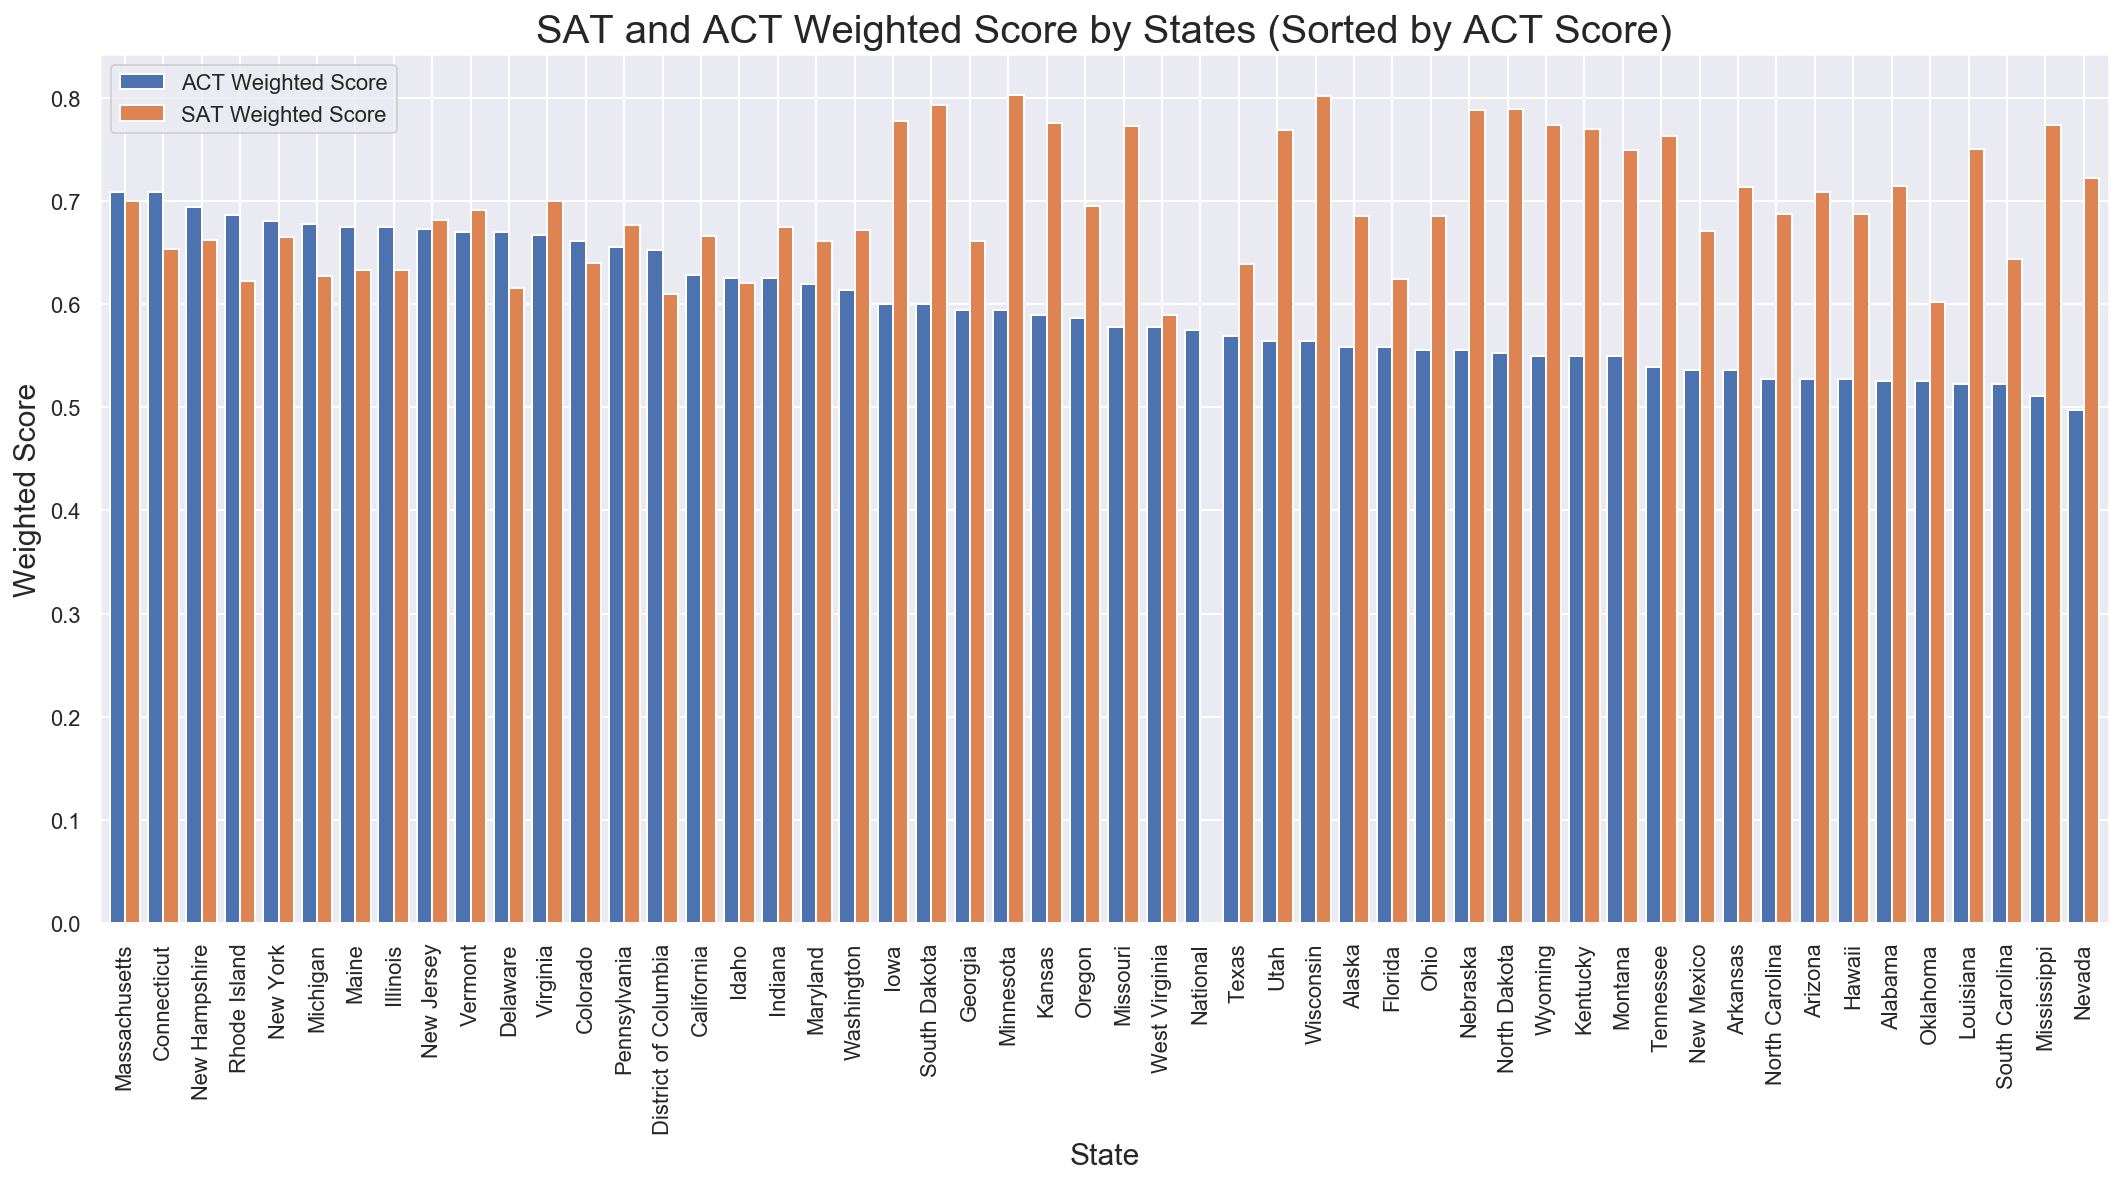

In [70]:
act_sat_19.sort_values(by = ['weighted_act_comp'], ascending = False, inplace = True)
act_sat_19.plot(x = 'state', y = ['weighted_act_comp', 'weighted_sat_comp'], kind = 'bar',figsize = (18,8), width =0.8, label=['ACT Weighted Score','SAT Weighted Score'])

plt.title('SAT and ACT Weighted Score by States (Sorted by ACT Score)',fontsize= 20)
plt.xlabel('State',fontsize= 15)
plt.ylabel('Weighted Score', fontsize= 15)

Massachusetts, Connecticut and New Hampshire has the highest performing ACT weighted score

Also notice both graph indicates that there may be an inverse relationship between those who scores well for SAT and those who score well for ACT in a particular state. This indicates that it may be better to prepare a single examination rather than taking both.

Minnesota, Wisconsin and South Dakota has the highest performing SAT weighted score of all the states.

Also, notice that Massachusett has consistent average score weights for both SAT and ACT examinations.

National data is only present for ACT and not SAT

Text(0, 0.5, 'Weighted Score')

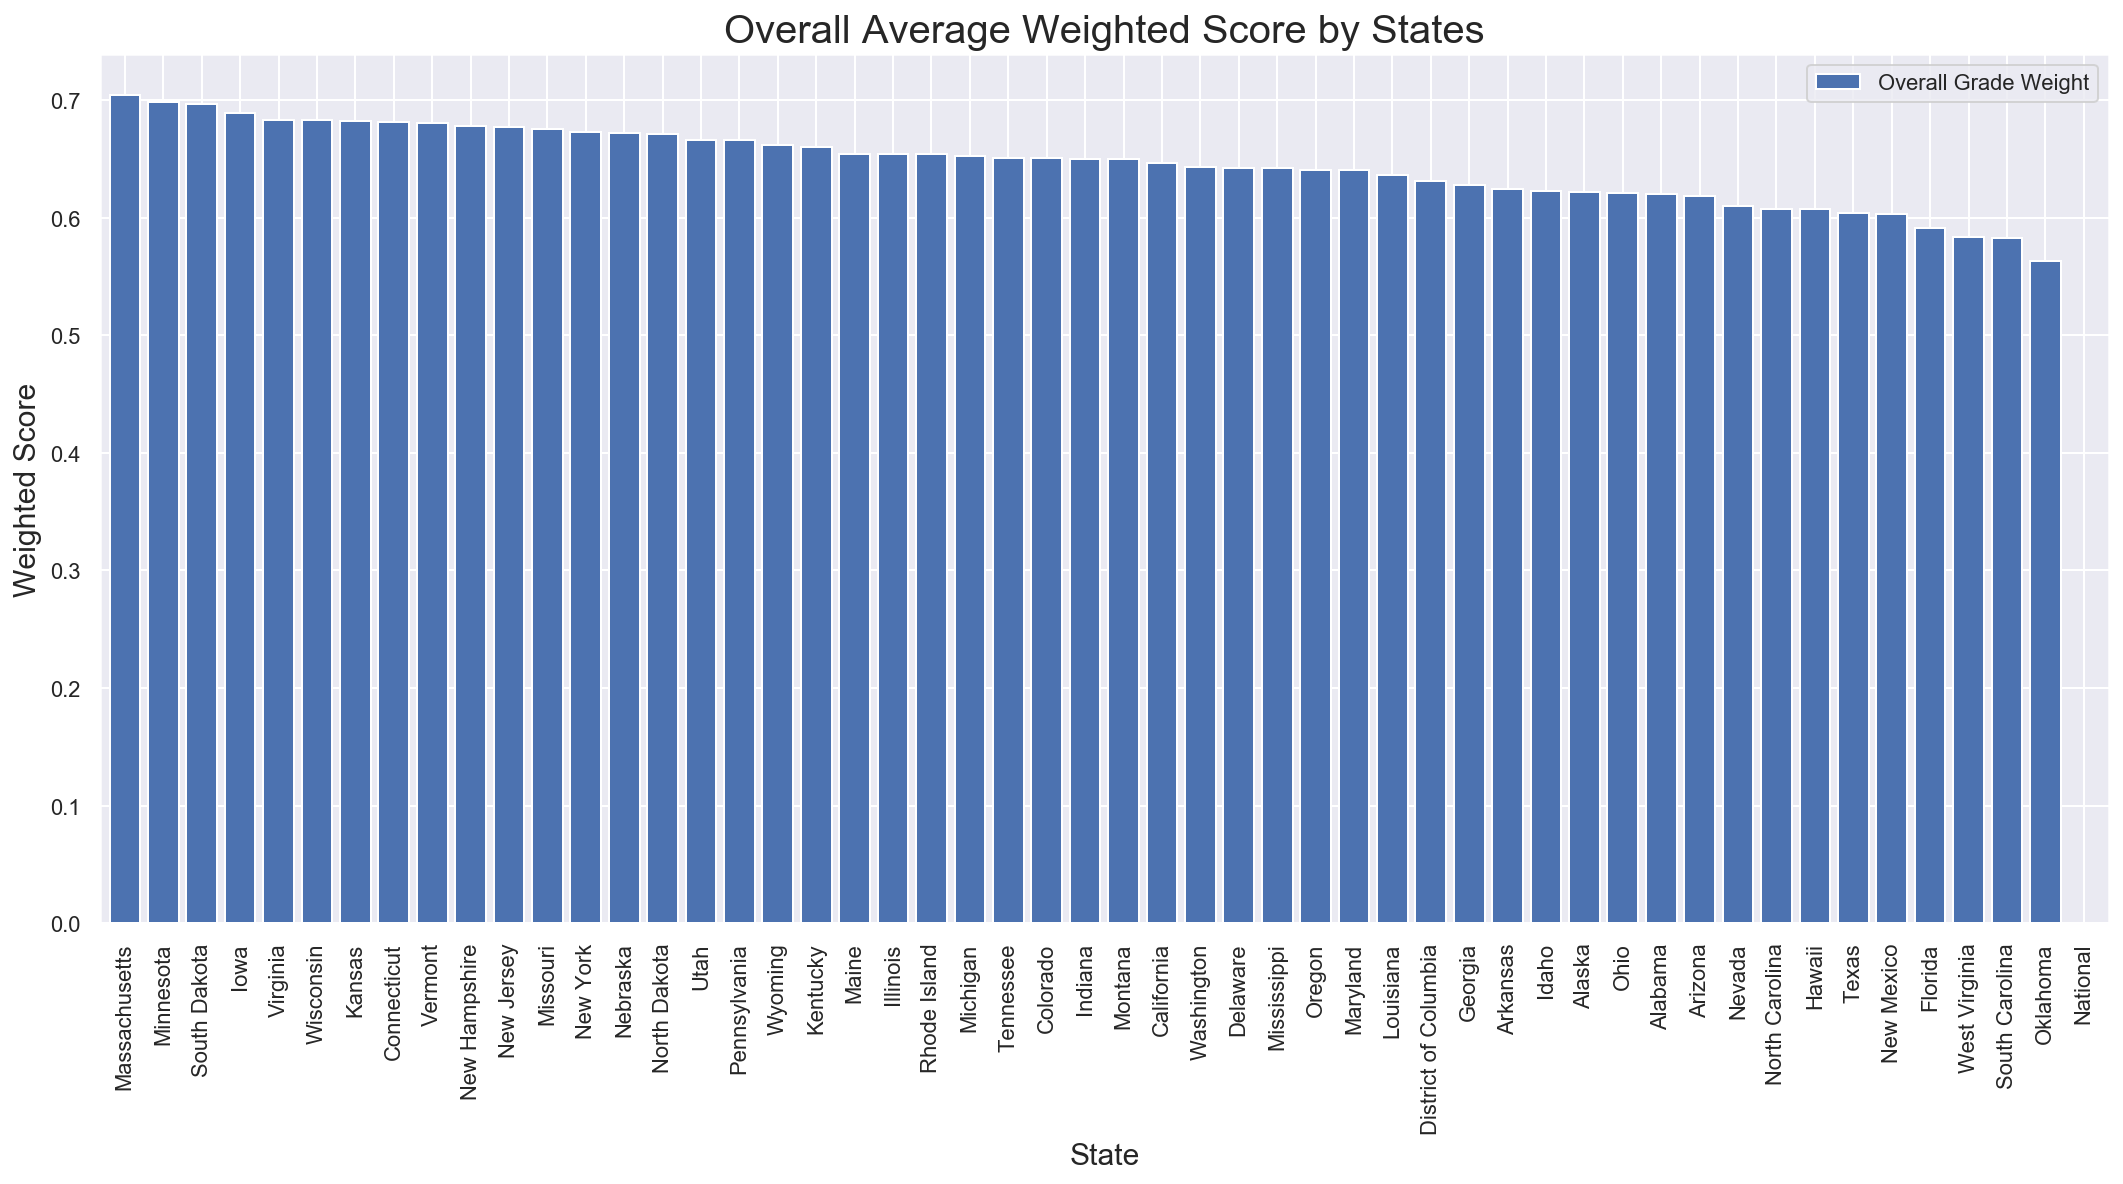

In [71]:
act_sat_19.sort_values(by = ['overall_grade_weight'], ascending = False, inplace = True)

act_sat_19.plot(x = 'state', y = 'overall_grade_weight', kind = 'bar',figsize = (18,8), width =0.8, label = "Overall Grade Weight")

plt.title('Overall Average Weighted Score by States',fontsize= 20)
plt.xlabel('State',fontsize= 15)
plt.ylabel('Weighted Score', fontsize= 15)

Massachusetts, Minnesota and South Dakota, Iowa and Virginia have the highest overall weight scores, whereas Oklahoma, South Carolina, West Virginia, Florida and New Mexico have the lowest overall weight score amongst all the states.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Overall Weighted Score')

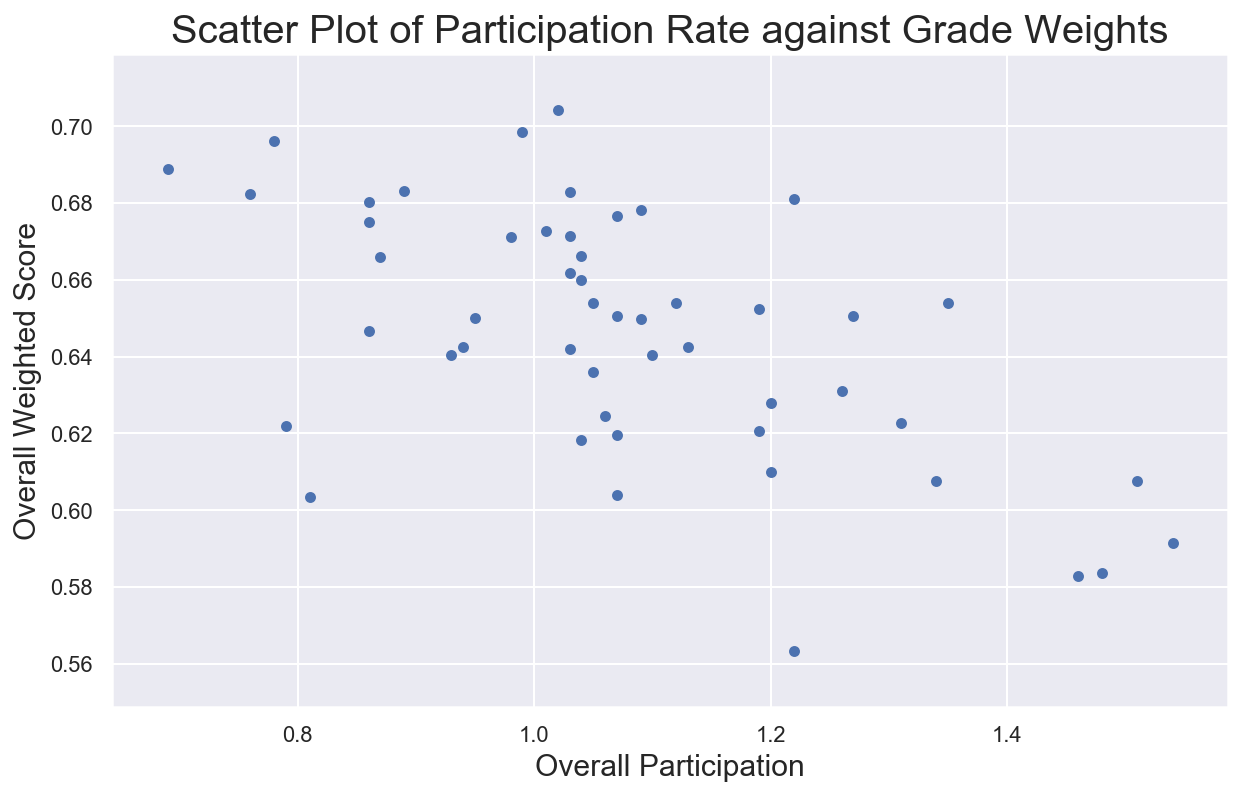

In [72]:
act_sat_19.plot(x = 'overall_participation', y = 'overall_grade_weight', kind = 'scatter')

plt.title('Scatter Plot of Participation Rate against Grade Weights',fontsize= 20)
plt.xlabel('Overall Participation',fontsize= 15)
plt.ylabel('Overall Weighted Score', fontsize= 15)

As Linear Regression is not covered yet, I am not including it in my analysis

However, there is a feasible trend of downward pattern between overall grade weight and overall participation. This indicates that it may be better to take a single examination instead of taking both.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Acceptance Rate')

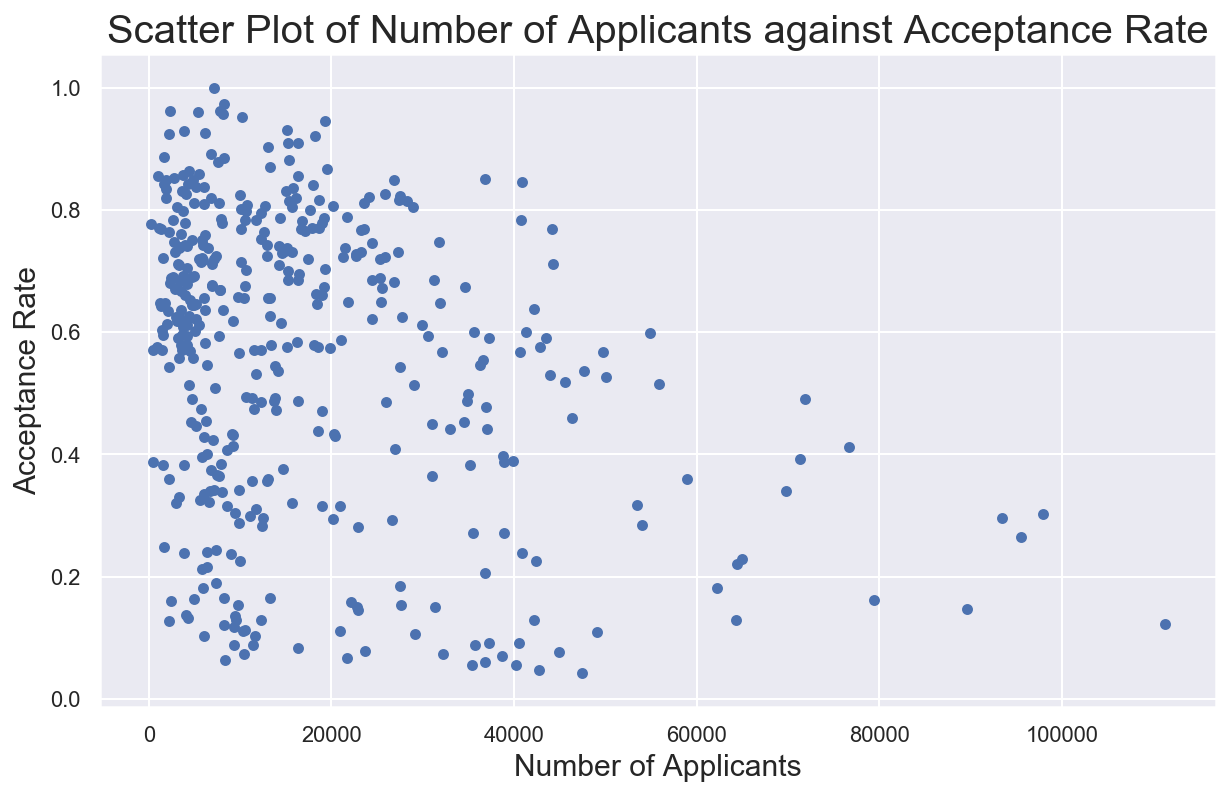

In [73]:
sat_act_clg.plot(x = 'number_of_applicants', y = 'accept_rate', kind = 'scatter')

plt.title('Scatter Plot of Number of Applicants against Acceptance Rate',fontsize= 20)
plt.xlabel('Number of Applicants',fontsize= 15)
plt.ylabel('Acceptance Rate', fontsize= 15)

It is clear that the larger the number of applicants there are for a particular college, the lower the chances of getting accepted into it.

## Conclusions and Recommendations

Many universities are shifting away from the standard ACT and SAT examination criteria and moving more towards other means of admissions. Thus it is advisable to students not to solely focus on SAT and ACT exams but to focus on their co-curricular activities and projects as well. 

Also note that ACT and SAT are not the sole factor to admission into colleges as several are dropping them as a requirement due to COVID-19, as well as because colleges do not believe that ACT and SAT tests are good predictors to how well a student does. (Refer to Further Research for more information)

It is recommended that students take either ACT or SAT examination instead of attempting both ACT and SAT examinations.

Location wise it may be better to move towards locations near the Ivy League colleges (Massachusetts, Minnesota, South Dakota) as these states have a higher scoring grade compared to other states. This is likely due to differences in education system in between  states.

Lastly, it is highly recommended to score at least 24.7, aiming towards 30.6 on their composite score in ACT exams, and at least 1167, aiming towards 1359 points on their total SAT score.